# Qiskit Lab1

## Quantum circuit and logic operation 

Goal

Create quantum circuit functions that can compute the XOR, AND, NAND and OR gates using the NOT gate (expressed as x in Qiskit), the CNOT gate (expressed as cx in Qiskit) and the Toffoli gate (expressed as ccx in Qiskit).

An implementation of the NOT gate is provided as an example.

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator


## NOT Gate

In [2]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw()
    
    # We'll run the program on a simulator
    backend = AerSimulator()
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

In [3]:
qc, output=NOT("0")

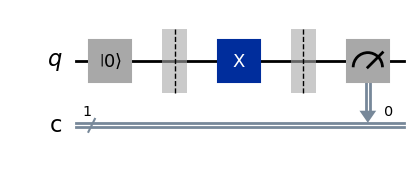

In [4]:
qc.draw(output="mpl")

## XOR Gate

Now it's your turn to implement the XOR gate.

Takes two binary strings as input and gives one as output.
The output is '0' when the inputs are equal and '1' otherwise.

In [5]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    
    
    
    
    
    
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = AerSimulator()
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## AND Gate

Please implement AND Gate.

Takes two binary strings as input and gives one as output.

The output is '1' only when both the inputs are '1'.

In [6]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes

    
    
    
    
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = AerSimulator()
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## NAND Gate

Please implement NAND gate.

Takes two binary strings as input and gives one as output.

The output is '0' only when both the inputs are '1'.

In [7]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # this is where your program for quantum NAND gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    #We'll run the program on a simulator
    backend = AerSimulator()
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## OR Gate

Please implement OR gate here.

In [8]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    #We'll run the program on a simulator
    backend = AerSimulator()
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

You can copy the implementation to the file https://github.com/yezhuoyang/QuantumLab/blob/main/test/testlogic.py and then run local auto test by yourself! 

## Part2: Running simulation on a fake noisy quantum computer

Your next task is to execute the AND gate on a fake quantum computer and try to understand the effect of noise.  

In Part 1 you made an AND gate from quantum gates, and executed it on the simulator. Here in Part 2 you will do it again, but instead run the circuits on a fake real quantum computer. One thing you should keep in mind is that present day quantum computers are not fault tolerant; they are noisy.

The 'noise' in a quantum system is the collective effects of all the things that should not happen, but nevertheless do. Noise results in outputs are not always what we would expect. There is noise associated with all processes in a quantum circuit: preparing the initial state, applying gates, and qubit measurement. For the gates, noise levels can vary between different gates and between different qubits. cx gates are typically more noisy than any single qubit gate.

Here we will use the quantum systems from the IBM Quantum Experience. If you do not have access, you can do so here.

Now that you are ready to use the real quantum computer, let's begin.


### Step1: Setup fakebackend

In [143]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram



coupling_map=[[0, 4], [0, 2], [4, 2], [2, 3], [4, 1], [0, 5]]

# Generate a 6-qubit simulated backend
backend = GenericBackendV2(num_qubits=6,coupling_map=coupling_map)


# Customize the noise level on each fake qubit.
# Please don't modify it during your experiment
backend.target['measure'][(0,)].error = 0.15
backend.target['measure'][(4,)].error = 0.15
backend.target['measure'][(2,)].error = 0.15

for (i,j) in coupling_map:
        backend.target['cx'][(i,j)].error = 0.1        
  
backend.target['measure'][(3,)].error = 0.3
backend.target['measure'][(1,)].error = 0.3
backend.target['measure'][(5,)].error = 0.3

### Step2: Define AND function for a fake quantum device

#### Qiskit Transpiler

It is important to know that when running a circuit on a real quantum computer, circuits typically need to be transpiled for the backend that you select so that the circuit contains only those gates that the quantum computer can actually perform. Primarily this involves the addition of swap gates so that two-qubit gates in the circuit map to those pairs of qubits on the device that can actually perform these gates. The following cell shows the AND gate represented as a Toffoli gate decomposed into single- and two-qubit gates, which are the only types of gate that can be run on IBM hardware.

In [144]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the required connectivity')
qc_and.decompose().draw()

AND gate


q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘



Transpiled AND gate with all the required connectivity


┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

In addition, there are often optimizations that the transpiler can perform that reduce the overall gate count, and thus total length of the input circuits. Note that the addition of swaps to match the device topology, and optimizations for reducing the length of a circuit are at odds with each other. In what follows we will make use of initial_layout that allows us to pick the qubits on a device used for the computation and optimization_level, an argument that allows selecting from internal defaults for circuit swap mapping and optimization methods to perform.

You can learn more about transpile function in depth here.

Let's modify AND function in Part1 properly for the fake quantum system with the transpile step included.

In [145]:
# run the cell to define AND gate for real quantum system
from qiskit.transpiler import Layout as Layout
# The input layout should be a dictionary:
# For example, if you want to map abtract qubit 0 to physical qubit 0,
# abtract qubit 1 to physical qubit 1, abtract qubit 2 to physical qubit 2,
# The input should be layout={0:0,1:1,2:2}
def AND(inp1, inp2, backend, layout:dict):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 

    initial_layout_dict={}
    for key in layout.keys():
        initial_layout_dict[qc.qubits[key]]=layout[key]

    
    qc_trans = transpile(qc, backend, initial_layout=initial_layout_dict, optimization_level=3)
    job = backend.run(qc_trans, shots=8192)
 
    output = job.result().get_counts()
    
    return qc_trans, output

In [146]:
backend

####  Your task: Determine three qubit initial layout considering the error map and assign it to the list variable layout2.

In [147]:

from qiskit import QuantumRegister

In [148]:
qc=QuantumCircuit(3)
Layout({
    qc.qubits[0]: 2,
    qc.qubits[1]: 0,
    qc.qubits[2]: 1,
})

Layout({
2: Qubit(QuantumRegister(3, 'q'), 0),
0: Qubit(QuantumRegister(3, 'q'), 1),
1: Qubit(QuantumRegister(3, 'q'), 2)
})

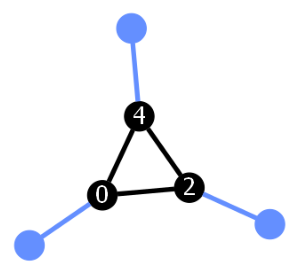

In [149]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(transpiled_circuit,backend,view="physical")   
# Save the figure to a file, e.g., as 'layout.png'

In [150]:
output_all = []
qc_trans_all = []
prob_all = []
layout=None
worst = 1
best = 0
layout={0:0,1:4,2:2}
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans, output = AND(input1, input2, backend, layout)
        
        output_all.append(output)
        qc_trans_all.append(qc_trans)
        
        prob = output[str(int( input1=='1' and input2=='1' ))]/8192
        prob_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))


Probability of correct answer for inputs 0 0
0.70
---------------------------------

Probability of correct answer for inputs 0 1
0.70
---------------------------------

Probability of correct answer for inputs 1 0
0.69
---------------------------------

Probability of correct answer for inputs 1 1
0.70
---------------------------------


The highest of these probabilities was 0.70
The lowest of these probabilities was 0.69


In [151]:
qc = QuantumCircuit(3, 1) 
qc.reset(range(3))
inp1='1'
inp2='1'
if inp1=='1':
    qc.x(0)
if inp2=='1':
    qc.x(1)
    
qc.barrier()
qc.ccx(0, 1, 2) 
qc.barrier()
qc.measure(2, 0) 

layout=Layout({
    qc.qubits[0]: 5,
    qc.qubits[1]: 0,
    qc.qubits[2]: 4,
})

qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
job = backend.run(qc_trans, shots=8192)

output = job.result().get_counts()



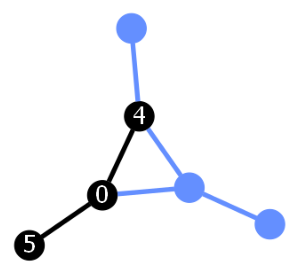

In [152]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_trans,backend,view="physical")   
# Save the figure to a file, e.g., as 'layout.png'